# ROC Curves

If a classifier provides prediction probabilities,  predictions are made by comparing prediction probabilities against a threshold $t$.   If the probability of a sample being predicted to a positive, $p$ is greater than or equal to $t$, then the sample is predicted to be a positive.

For each threshold $t$, we can compare:

1. How much the classifier is able to predict class 1.
    + This is the probability of class 1 samples being predicted  correctly.  
    + This is TPR or sensitivity or recall.
    + TP / (TP + FN)
        

2. How much the classifier is unable to predict class 0.
    + This is 1 - (the probability of class 0 samples being predicted correctly).
    + This is FPR or 1 - specificity.
    + 1 - TN / (TN + FP) = FP / (FP + TN)


The expectation is that as (1) increases, so does (2).   And vice versa.

The goal is to pick a threshold that provides a good trade-off between TPR and FPR.

An ROC curve is a figure that helps us understand the trade-off between TPR and FPR.f

The area under the ROC curve (ROC AUC) tells us how good a classifier is in terms of trading off TPR and FPR.

True Positive (TP) versus False Positive (TP)

TP - samples of class 1 and correctly predicted as class 1.

FP - samples of class 0 and incorrectly predicted as class 1.


In [1]:
import pandas
diabetes = pandas.read_csv('../../Datasets/diabetes.csv')

In [2]:
y = diabetes.Outcome
X = diabetes.drop(columns=['Outcome'])

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import ShuffleSplit, cross_validate, train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y)


In [4]:
logit = LogisticRegression(dual=False, max_iter=10000)
logit.fit(X_train, y_train)

dt = DecisionTreeClassifier(min_samples_leaf=5)
dt.fit(X_train, y_train)

rf = RandomForestClassifier(n_estimators=20, min_samples_leaf=5)
rf.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=5, n_estimators=20)

In [5]:
logit_pred = logit.predict_proba(X_test)
dt_pred = dt.predict_proba(X_test)
rf_pred = rf.predict_proba(X_test)

In [6]:
# logit.predict_proba(X_test)[0:10].round(2), logit.predict(X_test)[0:10]

In [7]:
from sklearn.metrics import roc_curve, roc_auc_score

In [8]:
fpr, tpr, thresholds = roc_curve(y_test, logit_pred[:,1])

In [9]:
import seaborn

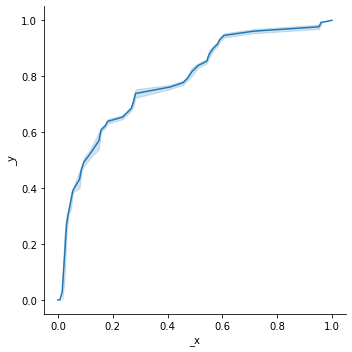

In [10]:
seaborn.relplot(x=fpr, y=tpr, kind='line')

In [12]:
roc_auc_score(y_test, logit_pred[:,1])

0.784251968503937

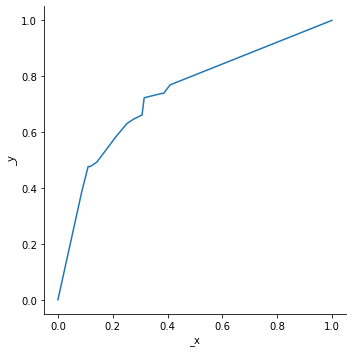

In [13]:
fpr, tpr, thresholds = roc_curve(y_test, dt_pred[:,1])
seaborn.relplot(x=fpr, y=tpr, kind='line')

In [14]:
roc_auc_score(y_test, dt_pred[:,1])

0.7373107207752878

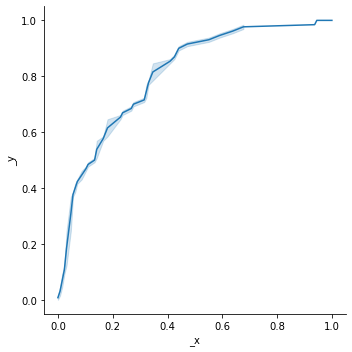

In [15]:
fpr, tpr, thresholds = roc_curve(y_test, rf_pred[:,1])
seaborn.relplot(x=fpr, y=tpr, kind='line')

In [16]:
roc_auc_score(y_test, rf_pred[:,1])

0.8068443367655967

### Understanding ROC Curves

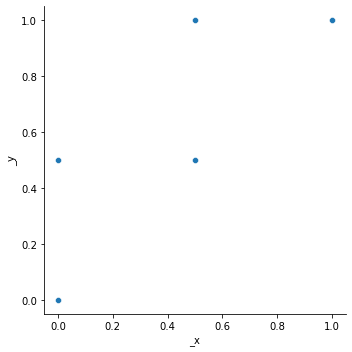

In [17]:
from sklearn.metrics import roc_curve, roc_auc_score
y =      ['non-diabetic','non-diabetic','diabetic', 'diabetic']
y_prob = [0.1,            0.4,           0.35,       0.8]
fpr, tpr, thresholds = roc_curve(y, y_prob, pos_label='diabetic')
seaborn.relplot(x=fpr, y=tpr, kind='scatter')

In [18]:
print(fpr)
print(tpr)
print(thresholds)

[0.  0.  0.5 0.5 1. ]
[0.  0.5 0.5 1.  1. ]
[1.8  0.8  0.4  0.35 0.1 ]


In [19]:
roc_auc_score(y, y_prob)

0.25

fpr (False Positive Rate) = FP / (TN + FP) = 1 - True-negative-rate = 1 - specificity

tpr (True Positive Rate) = TP / (TP + FN)

In this example, TN+FP is 2; TP+FN=2.

As the threshold $t$ is reduced, tpr is decreased and fpr is increased.

---

y = ['non-diabetic','non-diabetic','diabetic', 'diabetic']

y_prob = [0.1, 0.4, 0.35, 0.8]

+ t = 1.8,
    - prediction is 'diabetic' if p >= 1.8
        * ['non-diabetic', 'non-diabetic', 'non-diabetic', 'non-diabetic']
    - tp = 0. tpr=0
    - fp = 0. fpr=0

---

y = ['non-diabetic','non-diabetic','diabetic', 'diabetic']

y_prob = [0.1, 0.4, 0.35, 0.8]

+ t = 0.8,
    - prediction is 'diabetic' if p >= 0.8
        * ['non-diabetic', 'non-diabetic', 'non-diabetic', 'diabetic']
    - tp = 1. tpr=0.5
    - fp = 0. fpr=0

---

y = ['non-diabetic','non-diabetic','diabetic', 'diabetic']

y_prob = [0.1, 0.4, 0.35, 0.8]

+ t = 0.4,
    - prediction is 'diabetic' if p >= 0.4
        * ['non-diabetic', 'diabetic', 'non-diabetic', 'diabetic']
    - tp = 1. tpr=0.5
    - fp = 1. fpr=0.5

---

y = ['non-diabetic','non-diabetic','diabetic', 'diabetic']

y_prob = [0.1, 0.4, 0.35, 0.8]

+ t = 0.35,
    - prediction is 'diabetic' if p >= 0.35
        * ['non-diabetic', 'diabetic', 'diabetic', 'diabetic']
    - tp = 2. tpr=1
    - fp = 1. fpr=0.5

---

y = ['non-diabetic','non-diabetic','diabetic', 'diabetic']

y_prob = [0.1, 0.4, 0.35, 0.8]

+ t = 0.1,
    - prediction is 'diabetic' if p >= 1
        * ['diabetic', 'diabetic', 'diabetic', 'diabetic']
    - tp = 2. tpr=1
    - fp = 2. fpr=1

In [20]:
print(tpr)
print(fpr)
print(thresholds)

[0.  0.5 0.5 1.  1. ]
[0.  0.  0.5 0.5 1. ]
[1.8  0.8  0.4  0.35 0.1 ]


The expectation is that as (1) increases, so does (2). And vice versa.

The goal is to pick a threshold that provides a good trade-off between TPR and FPR.

An ROC curve is a figure that helps us understand the trade-off between TPR and FPR.

### Precision Recall Curves

In [21]:
from sklearn.metrics import precision_recall_curve

In [27]:
logit = LogisticRegression(dual=False, max_iter=10000)
logit.fit(X_train, y_train)

dt = DecisionTreeClassifier(min_samples_leaf=5)
dt.fit(X_train, y_train)

rf = RandomForestClassifier(n_estimators=20, min_samples_leaf=5)
rf.fit(X_train, y_train)

logit_pred = logit.predict_proba(X_test)
dt_pred = dt.predict_proba(X_test)
rf_pred = rf.predict_proba(X_test)

In [30]:
rf.predict(X_test.sample())

array([1])

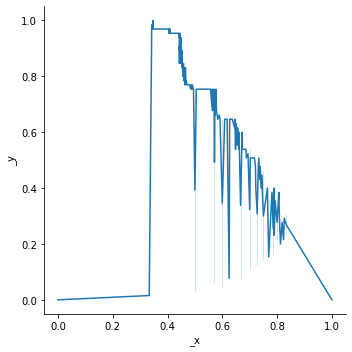

In [31]:
precisions, recalls, thresholds = precision_recall_curve(y_test, logit_pred[:,1])
seaborn.relplot(x=precisions, y=recalls, kind='line')

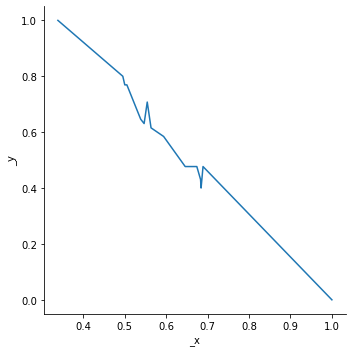

In [32]:
precisions, recalls, thresholds = precision_recall_curve(y_test, dt_pred[:,1])
seaborn.relplot(x=precisions, y=recalls, kind='line')

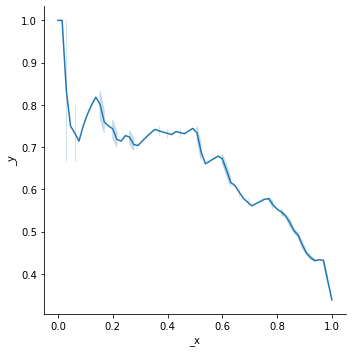

In [33]:
precisions, recalls, thresholds = precision_recall_curve(y_test, rf_pred[:,1])
seaborn.relplot(x=recalls, y=precisions, kind='line')

In [34]:
precisions, recalls, thresholds

(array([0.33854167, 0.34594595, 0.34782609, 0.34972678, 0.35164835,
        0.35359116, 0.35555556, 0.3575419 , 0.35955056, 0.36158192,
        0.36363636, 0.36571429, 0.36781609, 0.3699422 , 0.37209302,
        0.37426901, 0.37647059, 0.37869822, 0.38095238, 0.38323353,
        0.38554217, 0.38787879, 0.3902439 , 0.39263804, 0.39506173,
        0.39751553, 0.4       , 0.40251572, 0.40506329, 0.40764331,
        0.41025641, 0.41290323, 0.41558442, 0.41830065, 0.42105263,
        0.42384106, 0.42666667, 0.4295302 , 0.42567568, 0.42857143,
        0.43150685, 0.43448276, 0.4375    , 0.43356643, 0.42957746,
        0.43262411, 0.42857143, 0.43165468, 0.43478261, 0.4379562 ,
        0.44117647, 0.44444444, 0.44776119, 0.44360902, 0.4469697 ,
        0.45038168, 0.45384615, 0.4496124 , 0.453125  , 0.45669291,
        0.46031746, 0.464     , 0.46774194, 0.47154472, 0.47540984,
        0.47933884, 0.48333333, 0.48739496, 0.48305085, 0.48717949,
        0.49137931, 0.49565217, 0.5       , 0.49